<a href="https://colab.research.google.com/github/Mrunal018/Principle-Component-Analysis/blob/main/Backtesting(ta%26vectorbt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!pip install pandas_ta
#!pip install vectorbt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#import pandas_ta as ta
#import vectorbt as vbt
import plotly.graph_objects as go


In [19]:
df=pd.read_csv('/content/drive/MyDrive/Internship/Copy of EURUSD_05.05.2003-30.06.2021(1).csv')
df.columns=['time', 'open', 'high', 'low', 'close', 'volume']
df.reset_index(drop=True, inplace=True)
# Reset the index to bring back the 'time' column
df = df.reset_index()
# Now set the 'time' column as the index
df = df.set_index(['time'])
df.head()

df.index = pd.to_datetime(df.index, format='%d.%m.%Y %H:%M:%S.%f GMT%z', utc=True) # Set utc=True to handle timezone-aware datetimes

In [ ]:
print(df)

                           index     open     high      low    close  \
time                                                                   
2003-05-04 21:00:00+00:00      0  1.12354  1.13019  1.12030  1.12804   
2003-05-05 21:00:00+00:00      1  1.12798  1.14510  1.12738  1.14368   
2003-05-06 21:00:00+00:00      2  1.14367  1.14448  1.13275  1.13677   
2003-05-07 21:00:00+00:00      3  1.13675  1.15092  1.13026  1.15026   
2003-05-08 21:00:00+00:00      4  1.15002  1.15376  1.14362  1.14907   
...                          ...      ...      ...      ...      ...   
2021-06-23 21:00:00+00:00   4729  1.19267  1.19565  1.19178  1.19322   
2021-06-24 21:00:00+00:00   4730  1.19322  1.19754  1.19264  1.19392   
2021-06-27 21:00:00+00:00   4731  1.19380  1.19447  1.19025  1.19260   
2021-06-28 21:00:00+00:00   4732  1.19297  1.19334  1.18779  1.18973   
2021-06-29 21:00:00+00:00   4733  1.18973  1.19092  1.18452  1.18589   

                                 volume  
time                 

# **Highest close price**

In [ ]:
max_close = df['close'].max()
max_close_date = df[df['close'] == max_close].index[0]
print(f"The highest closing price was {max_close} on {max_close_date}")

The highest closing price was 1.59912 on 2008-04-21 21:00:00+00:00


# **52 Week Highest close price**

In [ ]:
# Resample the data to weekly frequency
df1 = df.resample('W').agg({'close': 'max'})

# Calculate the rolling 52-week (364 days) maximum
rolling_max = df1['close'].rolling(window=52, min_periods=1).max()

# Reset the index to access the date and rolling max values
rolling_max = rolling_max.reset_index()

# Initialize the list to store results
results = []

# Iterate over the DataFrame in 52-week chunks
for i in range(0, len(rolling_max), 52):
    period_max = rolling_max.iloc[i:i+52]
    if not period_max.empty:
        max_price = period_max['close'].max()
        max_price_date = period_max[period_max['close'] == max_price]['time'].iloc[0]
        results.append((max_price_date, max_price))

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['time', 'Highest_Price'])

# Sort the results DataFrame by time
results_df = results_df.sort_values(by='time').reset_index(drop=True)

# Display the results
print(results_df)


                        time  Highest_Price
0  2004-02-22 00:00:00+00:00        1.28398
1  2005-01-02 00:00:00+00:00        1.36345
2  2005-05-01 00:00:00+00:00        1.36345
3  2007-04-22 00:00:00+00:00        1.36140
4  2008-04-20 00:00:00+00:00        1.59474
5  2008-04-27 00:00:00+00:00        1.59912
6  2009-04-26 00:00:00+00:00        1.59378
7  2010-04-25 00:00:00+00:00        1.51338
8  2011-05-01 00:00:00+00:00        1.48311
9  2012-04-22 00:00:00+00:00        1.48311
10 2014-03-23 00:00:00+00:00        1.39342
11 2014-04-20 00:00:00+00:00        1.39342
12 2015-04-19 00:00:00+00:00        1.39280
13 2016-04-17 00:00:00+00:00        1.16208
14 2018-02-04 00:00:00+00:00        1.25101
15 2018-04-15 00:00:00+00:00        1.25101
16 2019-04-14 00:00:00+00:00        1.23740
17 2021-01-10 00:00:00+00:00        1.23292
18 2021-04-11 00:00:00+00:00        1.23292


Final portfolio value: $103.39
Positions:
BUY: 2004-02-05 22:00:00+00:00 at 1.27026, buying approximately 78.72 units with $100.00.
SELL: 2004-05-31 21:00:00+00:00 at 1.22477, selling 78.72 units for approximately $96.42.
BUY: 2004-10-14 21:00:00+00:00 at 1.24685, buying approximately 77.33 units with $96.42.
SELL: 2005-05-25 21:00:00+00:00 at 1.25110, selling 77.33 units for approximately $96.75.
BUY: 2006-04-23 21:00:00+00:00 at 1.23912, buying approximately 78.08 units with $96.75.
SELL: 2008-09-09 21:00:00+00:00 at 1.39992, selling 78.08 units for approximately $109.30.
BUY: 2009-05-25 21:00:00+00:00 at 1.39865, buying approximately 78.15 units with $109.30.
SELL: 2010-02-08 22:00:00+00:00 at 1.37961, selling 78.15 units for approximately $107.81.
BUY: 2010-10-14 21:00:00+00:00 at 1.39754, buying approximately 77.15 units with $107.81.
SELL: 2011-10-03 21:00:00+00:00 at 1.33522, selling 77.15 units for approximately $103.01.
BUY: 2012-10-25 21:00:00+00:00 at 1.29412, buying approxi

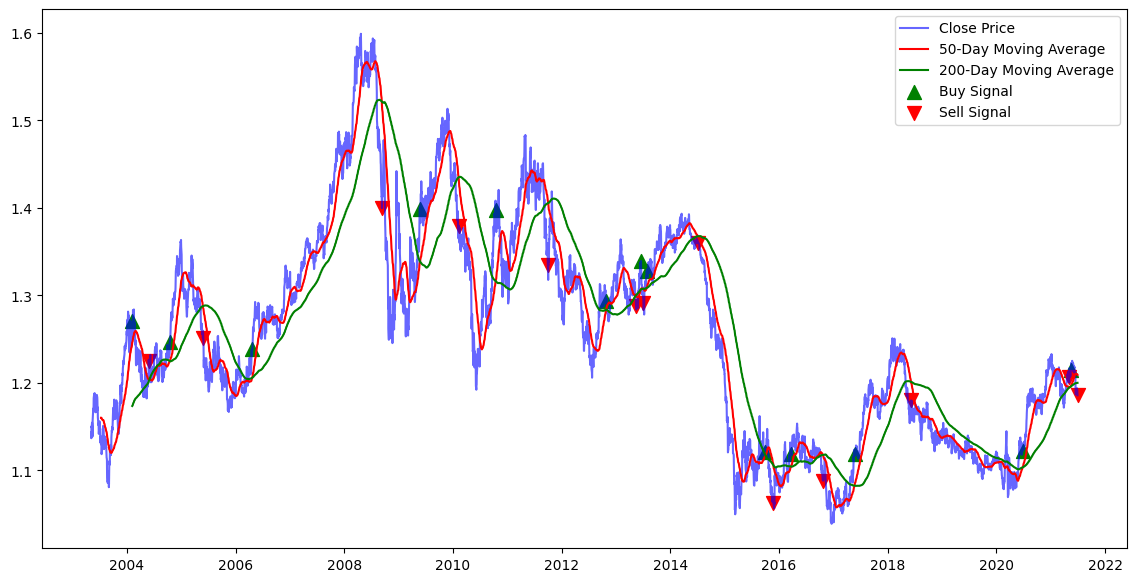

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/content/drive/MyDrive/Internship/Copy of EURUSD_05.05.2003-30.06.2021(1).csv')
df.columns=['time', 'open', 'high', 'low', 'close', 'volume']
df=df[df['volume']!=0]
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
# Reset the index to bring back the 'time' column
df = df.reset_index()
# Now set the 'time' column as the index
df = df.set_index(['time'])
df.head()

df.index = pd.to_datetime(df.index, format='%d.%m.%Y %H:%M:%S.%f GMT%z', utc=True) # Set utc=True to handle timezone-aware datetimes

short_window = 50
long_window = 200

df['short_mavg'] = df['close'].rolling(short_window).mean()
df['long_mavg'] = df['close'].rolling(long_window).mean()
df['long_positions'] = np.where(df['short_mavg'] > df['long_mavg'], 1, 0)
df['short_positions'] = np.where(df['short_mavg'] < df['long_mavg'], -1, 0)
df['positions'] = df['long_positions'] + df['short_positions']

class BacktestingFramework:
    def __init__(self, df, start_date, end_date):
        self.df = df[(df.index >= start_date) & (df.index <= end_date)]
        self.positions = []
        self.cash = 100  # Starting cash
        self.holdings = 0  # Initial holdings
        self.end_date = end_date

    def backtest(self):
        for index, row in self.df.iterrows():
            if row['positions'] == 1 and (len(self.positions) == 0 or self.positions[-1][0] != 'BUY'):
                self.buy(index, row['close'])
            elif row['positions'] == -1 and (len(self.positions) == 0 or self.positions[-1][0] != 'SELL'):
                self.sell(index, row['close'])

        # Sell all holdings at the end date
        self.final_sell()

    def buy(self, date, price):
        if self.cash > 0:
            additional_holdings = self.cash / price
            self.holdings += additional_holdings
            buy_value = self.cash
            self.cash = 0
            self.positions.append(('BUY', date, price, additional_holdings, buy_value))

    def sell(self, date, price):
        if self.holdings > 0:
            sell_value = self.holdings * price
            self.cash += sell_value
            sell_units = self.holdings
            self.holdings = 0
            self.positions.append(('SELL', date, price, sell_units, sell_value))

    def final_sell(self):
        if self.end_date not in self.df.index:
            self.end_date = self.df.index[-1]

        final_price = self.df.loc[self.end_date]['close']
        if self.holdings > 0:
            final_sell_value = self.holdings * final_price
            self.cash += final_sell_value
            self.positions.append(('FINAL SELL', self.end_date, final_price, self.holdings, final_sell_value))
            self.holdings = 0

    def analyze_results(self):
        final_value = self.cash
        print(f"Final portfolio value: ${final_value:.2f}")
        print("Positions:")
        for position in self.positions:
            action, date, price, units, value = position
            if action == 'BUY':
                print(f"BUY: {date} at {price:.5f}, buying approximately {units:.2f} units with ${value:.2f}.")
            elif action == 'SELL':
                print(f"SELL: {date} at {price:.5f}, selling {units:.2f} units for approximately ${value:.2f}.")
            elif action == 'FINAL SELL':
                print(f"Final Sell: {date} at {price:.5f}, selling {units:.2f} units for approximately ${value:.2f}.")

    def plot_results(self):
        buy_dates = [pos[1] for pos in self.positions if pos[0] == 'BUY']
        buy_prices = [pos[2] for pos in self.positions if pos[0] == 'BUY']
        sell_dates = [pos[1] for pos in self.positions if pos[0] in ['SELL', 'FINAL SELL']]
        sell_prices = [pos[2] for pos in self.positions if pos[0] in ['SELL', 'FINAL SELL']]

        plt.figure(figsize=(14, 7))
        plt.plot(self.df.index, self.df['close'], label='Close Price', color='blue', alpha=0.6)
        plt.plot(self.df.index, self.df['short_mavg'], label='50-Day Moving Average', color='red')
        plt.plot(self.df.index, self.df['long_mavg'], label='200-Day Moving Average', color='green')
        plt.scatter(buy_dates, buy_prices, marker='^', color='green', label='Buy Signal', s=100)
        plt.scatter(sell_dates, sell_prices, marker='v', color='red', label='Sell Signal', s=100)
        plt.legend()
        plt.show()

# Initialize and run the backtest
bt = BacktestingFramework(df, '2003-05-05', '2021-06-30')
bt.backtest()
bt.analyze_results()
bt.plot_results()


# **Determining Buying and Selling Signals using SMA(after removing holidays)**

BUY: 2004-02-05 22:00:00+00:00 at 1.27026, buying approximately 78.72 units with $99.99 after fees, holding for 5 days.
SELL: 2004-05-31 21:00:00+00:00 at 1.22477, selling all units for approximately $96.40 after fees. Gain/Loss: -3.60% Accumulated holdings: 118.07
BUY: 2004-10-14 21:00:00+00:00 at 1.24685, buying approximately 77.31 units with $96.39 after fees, holding for 5 days.
SELL: 2005-05-25 21:00:00+00:00 at 1.25110, selling all units for approximately $96.71 after fees. Gain/Loss: -3.29% Accumulated holdings: 115.96
BUY: 2006-04-23 21:00:00+00:00 at 1.23912, buying approximately 78.04 units with $96.70 after fees, holding for 5 days.
SELL: 2008-09-09 21:00:00+00:00 at 1.39992, selling all units for approximately $109.24 after fees. Gain/Loss: 9.24% Accumulated holdings: 117.06
BUY: 2009-05-25 21:00:00+00:00 at 1.39865, buying approximately 78.09 units with $109.23 after fees, holding for 5 days.
SELL: 2010-02-08 22:00:00+00:00 at 1.37961, selling all units for approximately $

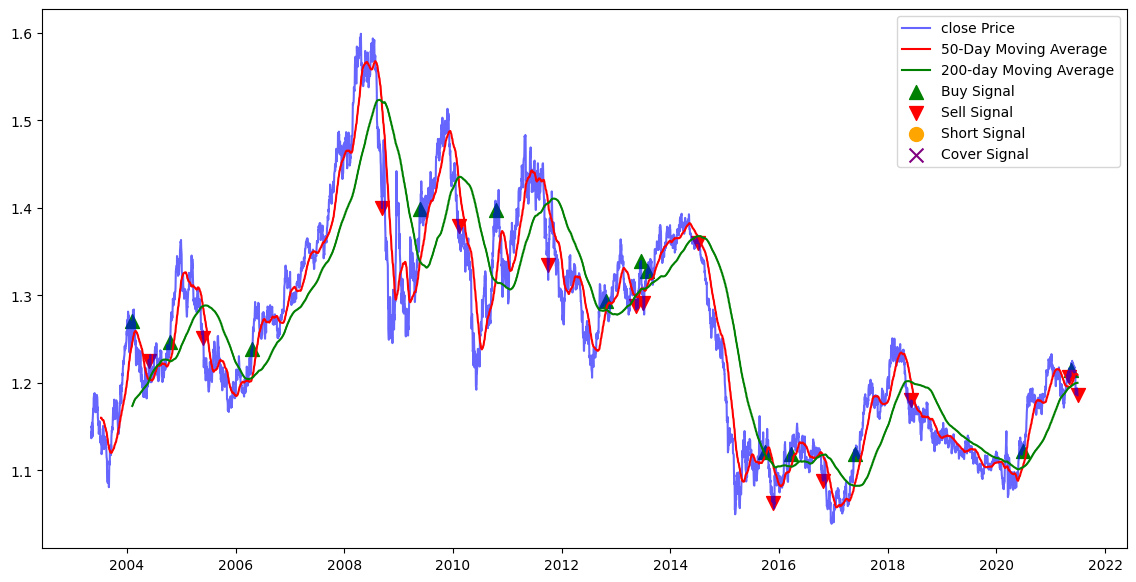

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


df=pd.read_csv('/content/drive/MyDrive/Internship/Copy of EURUSD_05.05.2003-30.06.2021(1).csv')
df.columns=['time', 'open', 'high', 'low', 'close', 'volume']
df=df[df['volume']!=0]
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
# Reset the index to bring back the 'time' column
df = df.reset_index()
# Now set the 'time' column as the index
df = df.set_index(['time'])
df.head()

df.index = pd.to_datetime(df.index, format='%d.%m.%Y %H:%M:%S.%f GMT%z', utc=True) # Set utc=True to handle timezone-aware datetimes

short_window = 50
long_window = 200

df['short_mavg'] = df['close'].rolling(short_window).mean()
df['long_mavg'] = df['close'].rolling(long_window).mean()
df['long_positions'] = np.where(df['short_mavg'] > df['long_mavg'], 1, 0)
df['short_positions'] = np.where(df['short_mavg'] < df['long_mavg'], -1, 0)
df['positions'] = df['long_positions'] + df['short_positions']

class BacktestingFramework:
    def __init__(self, df, start_date, end_date, trading_fees=0, accumulation_factor=0):
        self.df = df[(df.index >= start_date) & (df.index <= end_date)]
        # Convert start_date to datetime object without timezone information
        self.start_date = pd.to_datetime(start_date).tz_localize(None)
        self.end_date = pd.to_datetime(end_date).tz_localize(None)
        self.positions = []
        self.initial_cash = 100  # Starting cash
        self.cash = self.initial_cash  # Current cash
        self.holdings = 0  # Initial holdings
        self.short_holdings = 0  # Initial short holdings
        self.position_value = 0
        self.duration = 1  # Default duration in days
        self.trading_fees = trading_fees  # Trading fees per trade
        self.initial_portfolio_value = None
        self.final_portfolio_value = None
        self.percent_gain_loss = None
        self.accumulation_factor = accumulation_factor  # Accumulation factor for reinvesting gains

    def backtest(self):
        self.initial_portfolio_value = self.initial_cash
        for index, row in self.df.iterrows():
            if row['positions'] == 1 and (len(self.positions) == 0 or self.positions[-1][0] != 'BUY'):
                self.buy(index, row['close'])
            elif row['positions'] == -1 and (len(self.positions) == 0 or self.positions[-1][0] != 'SELL'):
                self.sell(index, row['close'], index) # Pass index to the sell method

        # Sell all holdings at the end date
        self.final_sell()

        # Calculate final portfolio value
        self.final_portfolio_value = self.cash + self.holdings * self.df.iloc[-1]['close'] - self.short_holdings * self.df.iloc[-1]['close']
        self.percent_gain_loss = ((self.final_portfolio_value - self.initial_portfolio_value) / self.initial_portfolio_value) * 100

    def buy(self, date, price):
        if self.cash > 0:
            self.holdings = (self.cash - self.trading_fees) / price
            self.cash -= self.trading_fees
            self.positions.append(('BUY', date, price, self.duration, None))  # None for gain/loss
            print(f"BUY: {date} at {price:.5f}, buying approximately {self.holdings:.2f} units with ${self.cash:.2f} after fees, holding for {self.duration} days.")

    def sell(self, date, price, index): # Add index as a parameter
        if self.holdings > 0:
            self.cash = (self.holdings * price) - self.trading_fees
            gain_loss_percentage = ((self.cash - self.initial_portfolio_value) / self.initial_portfolio_value) * 100
            self.holdings += self.holdings * self.accumulation_factor  # Accumulate gains
            index_naive = index.tz_localize(None)
            duration = (index_naive - self.start_date).days  # Calculate duration in days
            self.positions.append(('SELL', date, price, duration, gain_loss_percentage))
            print(f"SELL: {date} at {price:.5f}, selling all units for approximately ${self.cash:.2f} after fees. Gain/Loss: {gain_loss_percentage:.2f}% Accumulated holdings: {self.holdings:.2f}")
        elif self.short_holdings == 0:
            self.short_holdings = (self.cash - self.trading_fees) / price
            self.cash -= self.trading_fees
            self.positions.append(('SHORT', date, price, self.duration, None))  # None for gain/loss
            print(f"SHORT: {date} at {price:.5f}, shorting approximately")

    def final_sell(self):
        if self.holdings > 0:
            self.cash += self.holdings * self.df.iloc[-1]['close'] - self.trading_fees
            gain_loss_percentage = ((self.cash - self.initial_portfolio_value) / self.initial_portfolio_value) * 100
            duration = (self.end_date - self.start_date).days  # Calculate duration in days
            self.positions.append(('SELL', self.end_date, self.df.iloc[-1]['close'], duration, gain_loss_percentage))
            print(f"FINAL SELL: {self.end_date} at {self.df.iloc[-1]['close']:.5f}, selling all remaining units for approximately ${self.cash:.2f} after fees. Gain/Loss: {gain_loss_percentage:.2f}% Accumulated holdings: {self.holdings:.2f}")
            self.holdings = 0
        elif self.short_holdings < 0:
            self.cash += self.short_holdings * self.df.iloc[-1]['close'] - self.trading_fees
            gain_loss_percentage = ((self.cash - self.initial_portfolio_value) / self.initial_portfolio_value) * 100
            duration = (self.end_date - self.start_date).days  # Calculate duration in days
            self.positions.append(('COVER', self.end_date, self.df.iloc[-1]['close'], duration, gain_loss_percentage))
            print(f"FINAL COVER: {self.end_date} at {self.df.iloc[-1]['close']:.5f}, covering all remaining short units for approximately ${self.cash:.2f} after fees. Gain/Loss: {gain_loss_percentage:.2f}% Accumulated short holdings: {self.short_holdings:.2f}")

    def analyze_results(self):
        print(f"Initial portfolio value: ${self.initial_portfolio_value:.2f}")
        print(f"Final portfolio value: ${self.final_portfolio_value:.2f}")
        print(f"Percentage gain/loss: {self.percent_gain_loss:.2f}%")
        print(f"Total trading duration: {(self.end_date - self.start_date).days} days")
        print("\nIndividual Trade Results:")
        for trade in self.positions:
            if trade[0] in ['SELL', 'COVER']:
                print(f"{trade[0]}: Date - {trade[1]}, Price - {trade[2]:.5f}, Duration - {trade[3]} days, Gain/Loss - {trade[4]:.2f}%")

    def plot_results(self):
        buy_dates = [pos[1] for pos in self.positions if pos[0] == 'BUY']
        buy_prices = [pos[2] for pos in self.positions if pos[0] == 'BUY']
        sell_dates = [pos[1] for pos in self.positions if pos[0] == 'SELL']
        sell_prices = [pos[2] for pos in self.positions if pos[0] == 'SELL']
        short_dates = [pos[1] for pos in self.positions if pos[0] == 'SHORT']
        short_prices = [pos[2] for pos in self.positions if pos[0] == 'SHORT']
        cover_dates = [pos[1] for pos in self.positions if pos[0] == 'COVER']
        cover_prices = [pos[2] for pos in self.positions if pos[0] == 'COVER']

        # Convert the dates to matplotlib's numerical representation
        buy_dates_num = [pd.to_datetime(d).tz_localize(None).to_pydatetime() for d in buy_dates]
        sell_dates_num = [pd.to_datetime(d).tz_localize(None).to_pydatetime() for d in sell_dates]
        short_dates_num = [pd.to_datetime(d).tz_localize(None).to_pydatetime() for d in short_dates]
        cover_dates_num = [pd.to_datetime(d).tz_localize(None).to_pydatetime() for d in cover_dates]
        df_index_num = [pd.to_datetime(d).tz_localize(None).to_pydatetime() for d in self.df.index]

        plt.figure(figsize=(14, 7))
        # Use the converted numerical dates for plotting
        plt.plot(df_index_num, self.df['close'], label='close Price', color='blue', alpha=0.6)
        plt.plot(df_index_num, self.df['short_mavg'], label='50-Day Moving Average', color='red')
        plt.plot(df_index_num, self.df['long_mavg'], label='200-day Moving Average', color='green')
        plt.scatter(buy_dates_num, buy_prices, marker='^', color='green', label='Buy Signal', s=100)
        plt.scatter(sell_dates_num, sell_prices, marker='v', color='red', label='Sell Signal', s=100)
        plt.scatter(short_dates_num, short_prices, marker='o', color='orange', label='Short Signal', s=100)
        plt.scatter(cover_dates_num, cover_prices, marker='x', color='purple', label='Cover Signal', s=100)
        plt.legend()
        plt.show()



# Example usage:
bt = BacktestingFramework(df, '2003-05-05', '2021-06-30', trading_fees=0.01, accumulation_factor=0.5)
bt.duration = 5
bt.backtest()
bt.analyze_results()
bt.plot_results()


# **Adding parameters cumulative return, Drawdown and trade return**

BUY: 2004-02-05 22:00:00+00:00 at 1.27026, buying approximately 78.72 units with $99.99 after fees, holding for 5 days.
SELL: 2004-05-31 21:00:00+00:00 at 1.22477, selling all units for approximately $96.40 after fees. Gain/Loss: -3.59% Accumulated holdings: 118.07
BUY: 2004-10-14 21:00:00+00:00 at 1.24685, buying approximately 77.31 units with $96.39 after fees, holding for 5 days.
SELL: 2005-05-25 21:00:00+00:00 at 1.25110, selling all units for approximately $96.71 after fees. Gain/Loss: 0.32% Accumulated holdings: 115.96
BUY: 2006-04-23 21:00:00+00:00 at 1.23912, buying approximately 78.04 units with $96.70 after fees, holding for 5 days.
SELL: 2008-09-09 21:00:00+00:00 at 1.39992, selling all units for approximately $109.24 after fees. Gain/Loss: 12.54% Accumulated holdings: 117.06
BUY: 2009-05-25 21:00:00+00:00 at 1.39865, buying approximately 78.09 units with $109.23 after fees, holding for 5 days.
SELL: 2010-02-08 22:00:00+00:00 at 1.37961, selling all units for approximately $

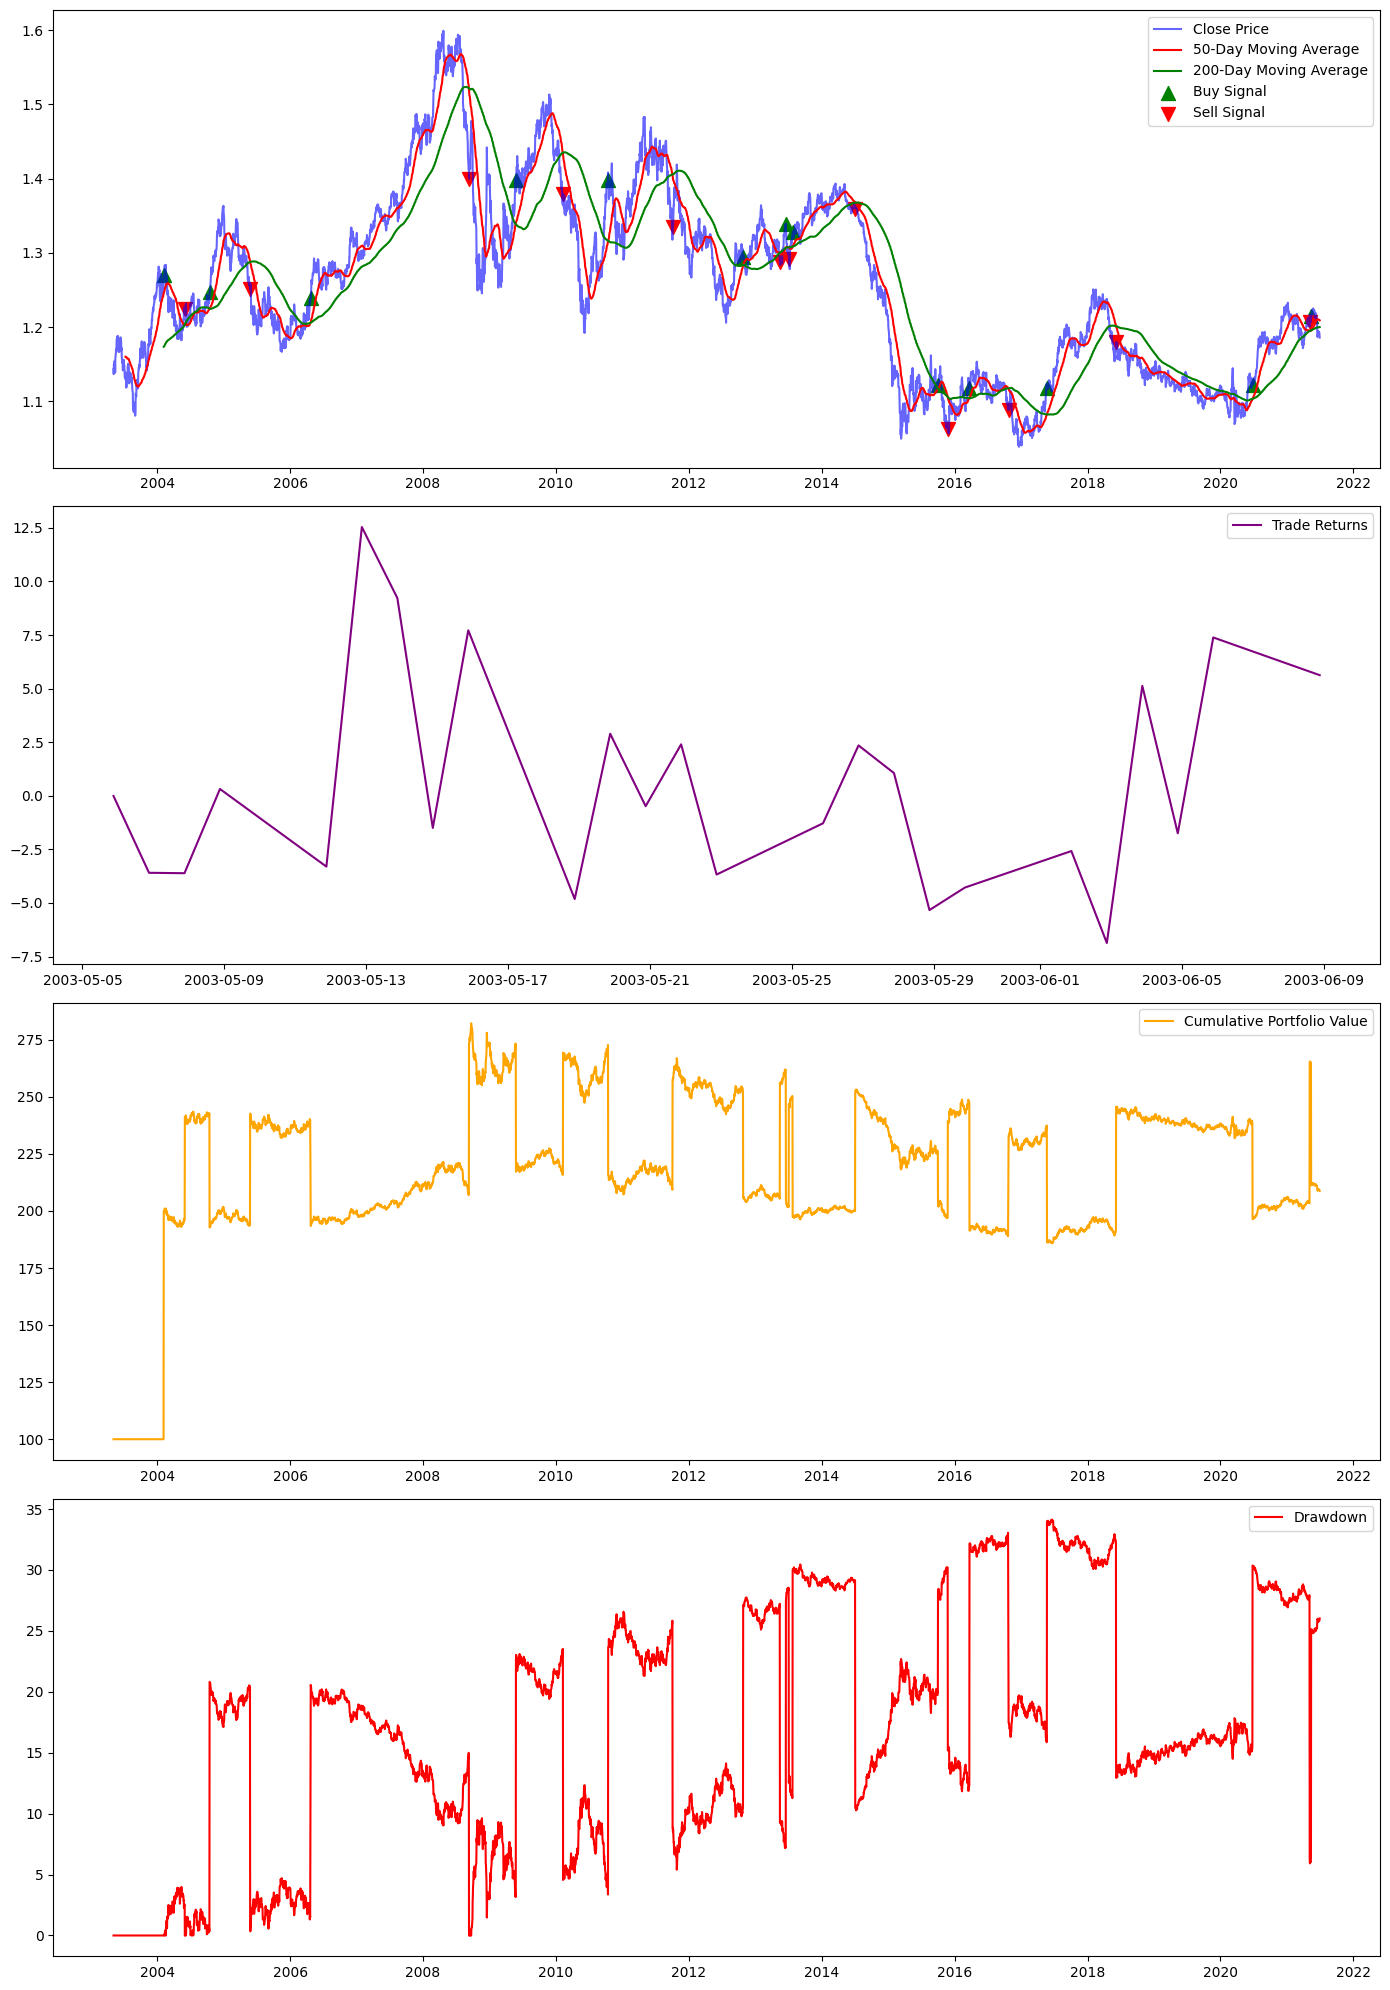

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/content/drive/MyDrive/Internship/Copy of EURUSD_05.05.2003-30.06.2021(1).csv')
df.columns=['time', 'open', 'high', 'low', 'close', 'volume']
df=df[df['volume']!=0]
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
# Reset the index to bring back the 'time' column
df = df.reset_index()
# Now set the 'time' column as the index
df = df.set_index(['time'])
df.head()

df.index = pd.to_datetime(df.index, format='%d.%m.%Y %H:%M:%S.%f GMT%z', utc=True) # Set utc=True to handle timezone-aware datetimes

short_window = 50
long_window = 200

df['short_mavg'] = df['close'].rolling(short_window).mean()
df['long_mavg'] = df['close'].rolling(long_window).mean()
df['long_positions'] = np.where(df['short_mavg'] > df['long_mavg'], 1, 0)
df['short_positions'] = np.where(df['short_mavg'] < df['long_mavg'], -1, 0)
df['positions'] = df['long_positions'] + df['short_positions']

class BacktestingFramework:
    def __init__(self, df, start_date, end_date, trading_fees=0, accumulation_factor=0):
        self.df = df[(df.index >= start_date) & (df.index <= end_date)]
        self.start_date = pd.to_datetime(start_date).tz_localize(None)
        self.end_date = pd.to_datetime(end_date).tz_localize(None)
        self.positions = []
        self.initial_cash = 100  # Starting cash
        self.cash = self.initial_cash  # Current cash
        self.holdings = 0  # Initial holdings
        self.short_holdings = 0  # Initial short holdings
        self.position_value = 0
        self.duration = 1  # Default duration in days
        self.trading_fees = trading_fees  # Trading fees per trade
        self.initial_portfolio_value = None
        self.final_portfolio_value = None
        self.percent_gain_loss = None
        self.accumulation_factor = accumulation_factor  # Accumulation factor for reinvesting gains
        self.gain_loss_list = []
        self.trade_pnl_list = []
        self.drawdown_list = []
        self.num_trades_list = []
        self.portfolio_values = []  # Initialize the list to store portfolio values

    def backtest(self):
        self.initial_portfolio_value = self.initial_cash
        for index, row in self.df.iterrows():
            if row['positions'] == 1 and (len(self.positions) == 0 or self.positions[-1][0] != 'BUY'):
                self.buy(index, row['close'])
            elif row['positions'] == -1 and (len(self.positions) == 0 or self.positions[-1][0] != 'SELL'):
                self.sell(index, row['close'], index)
            self.portfolio_values.append(self.cash + self.holdings * row['close'] - self.short_holdings * row['close'])  # Now you can append values

        # Calculate final portfolio value
        self.final_portfolio_value = self.cash + self.holdings * self.df.iloc[-1]['close'] - self.short_holdings * self.df.iloc[-1]['close']
        self.percent_gain_loss = ((self.final_portfolio_value - self.initial_portfolio_value) / self.initial_portfolio_value) * 100
        self.calculate_drawdowns()

    def buy(self, date, price):
        if self.cash > 0:
            self.holdings = (self.cash - self.trading_fees) / price
            self.cash -= self.trading_fees
            self.positions.append(('BUY', date, price, self.duration, None))
            # Calculate and append metrics
            gain_loss_percentage = 0  # Calculate gain/loss percentage
            self.gain_loss_list.append(gain_loss_percentage)
            self.trade_pnl_list.append(self.cash - self.initial_cash)
            self.drawdown_list.append(min(self.drawdown_list[-1], self.cash) if self.drawdown_list else self.cash)
            self.num_trades_list.append(len(self.positions))
            print(f"BUY: {date} at {price:.5f}, buying approximately {self.holdings:.2f} units with ${self.cash:.2f} after fees, holding for {self.duration} days.")

    def sell(self, date, price, index):
        if self.holdings > 0:
            pnl = (self.holdings * price) - self.cash - self.trading_fees
            self.cash = (self.holdings * price) - self.trading_fees
            gain_loss_percentage = (pnl / self.initial_cash) * 100
            self.trade_pnl_list.append(gain_loss_percentage)
            self.holdings += self.holdings * self.accumulation_factor

            # Calculate and append metrics
            index_naive = index.tz_localize(None)
            duration = (index_naive - self.start_date).days
            self.positions.append(('SELL', date, price, duration, gain_loss_percentage))
            self.num_trades_list.append(len(self.positions))

            print(f"SELL: {date} at {price:.5f}, selling all units for approximately ${self.cash:.2f} after fees. Gain/Loss: {gain_loss_percentage:.2f}% Accumulated holdings: {self.holdings:.2f}")
        elif self.short_holdings == 0:
            self.short_holdings = (self.cash - self.trading_fees) / price
            self.cash -= self.trading_fees

            # Append short position to positions list
            index_naive = index.tz_localize(None)
            duration = (index_naive - self.start_date).days
            self.positions.append(('SHORT', date, price, duration, None))
            self.num_trades_list.append(len(self.positions))

            print(f"SHORT: {date} at {price:.5f}, shorting approximately")

    def calculate_drawdowns(self):
        peak = self.portfolio_values[0]
        self.drawdown_list = [] # Reset drawdown_list
        for value in self.portfolio_values:
            if value > peak:
                peak = value
            drawdown = (peak - value) / peak
            self.drawdown_list.append(drawdown * 100)  # Convert to percentage

    def analyze_results(self):
        print(f"Initial portfolio value: ${self.initial_portfolio_value:.2f}")
        print(f"Final portfolio value: ${self.final_portfolio_value:.2f}")
        print(f"Percentage gain/loss: {self.percent_gain_loss:.2f}%")
        print(f"Total trading duration: {(self.end_date - self.start_date).days} days")
        print(f"Total number of trades: {len(self.positions)}")
        print("\nIndividual Trade Results:")
        for trade in self.positions:
            if trade[0] in ['SELL', 'COVER']:
                print(f"{trade[0]}: Date - {trade[1]}, Price - {trade[2]:.5f}, Duration - {trade[3]} days, Gain/Loss - {trade[4]:.2f}%")

    def plot_results(self):
        buy_dates = [pos[1] for pos in self.positions if pos[0] == 'BUY']
        buy_prices = [pos[2] for pos in self.positions if pos[0] == 'BUY']
        sell_dates = [pos[1] for pos in self.positions if pos[0] == 'SELL']
        sell_prices = [pos[2] for pos in self.positions if pos[0] == 'SELL']

        fig, axs = plt.subplots(4, 1, figsize=(14, 20))
        # Plotting close prices and moving averages
        axs[0].plot(self.df.index, self.df['close'], label='Close Price', color='blue', alpha=0.6)
        axs[0].plot(self.df.index, self.df['short_mavg'], label='50-Day Moving Average', color='red')
        axs[0].plot(self.df.index, self.df['long_mavg'], label='200-Day Moving Average', color='green')
        axs[0].scatter(buy_dates, buy_prices, marker='^', color='green', label='Buy Signal', s=100)
        axs[0].scatter(sell_dates, sell_prices, marker='v', color='red', label='Sell Signal', s=100)
        axs[0].legend()

        # Plotting trade returns
        axs[1].plot(self.df.index[:len(self.trade_pnl_list)], self.trade_pnl_list, label='Trade Returns', color='purple')
        axs[1].legend()

        # Plotting cumulative portfolio value
        axs[2].plot(self.df.index, self.portfolio_values, label='Cumulative Portfolio Value', color='orange')
        axs[2].legend()

        # Plotting drawdown
        axs[3].plot(self.df.index[:len(self.drawdown_list)], self.drawdown_list, label='Drawdown', color='red')
        axs[3].legend()

        plt.tight_layout()
        plt.show()

# Example usage
# Assuming df, start_date, end_date are defined and loaded
bt = BacktestingFramework(df, '2003-05-05', '2021-06-30', trading_fees=0.01, accumulation_factor=0.5)
bt.duration = 5
bt.backtest()
bt.analyze_results()
bt.plot_results()


# **Without removing holidays**

Final portfolio value: $132.16
Positions:
BUY: 2003-11-19 22:00:00+00:00 at 1.19111, buying approximately 83.96 units with $100.00.
SELL: 2004-04-18 21:00:00+00:00 at 1.20234, selling 83.96 units for approximately $100.94.
BUY: 2004-08-09 21:00:00+00:00 at 1.22368, buying approximately 82.49 units with $100.94.
SELL: 2005-04-26 21:00:00+00:00 at 1.29288, selling 82.49 units for approximately $106.65.
BUY: 2006-02-16 22:00:00+00:00 at 1.19381, buying approximately 89.34 units with $106.65.
SELL: 2006-03-06 22:00:00+00:00 at 1.18850, selling 89.34 units for approximately $106.18.
BUY: 2006-03-29 22:00:00+00:00 at 1.21667, buying approximately 87.27 units with $106.18.
SELL: 2006-10-22 21:00:00+00:00 at 1.25491, selling 87.27 units for approximately $109.51.
BUY: 2006-11-26 22:00:00+00:00 at 1.31328, buying approximately 83.39 units with $109.51.
SELL: 2008-08-21 21:00:00+00:00 at 1.47919, selling 83.39 units for approximately $123.35.
BUY: 2009-04-18 21:00:00+00:00 at 1.30465, buying app

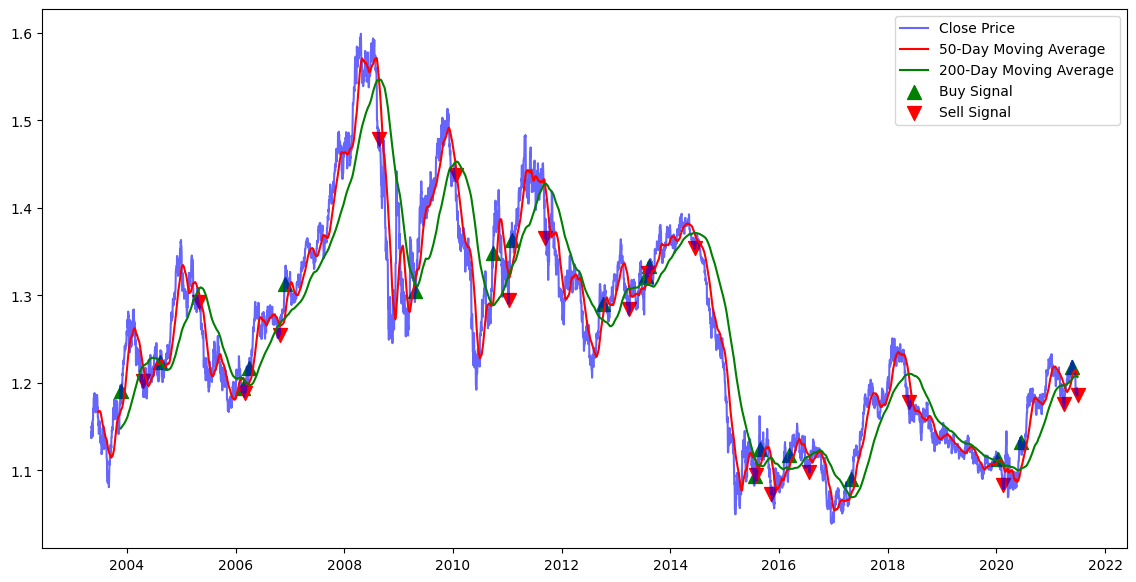

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/content/drive/MyDrive/Internship/Copy of EURUSD_05.05.2003-30.06.2021(1).csv')
df.columns=['time', 'open', 'high', 'low', 'close', 'volume']
df.reset_index(drop=True, inplace=True)
# Reset the index to bring back the 'time' column
df = df.reset_index()
# Now set the 'time' column as the index
df = df.set_index(['time'])
df.head()

df.index = pd.to_datetime(df.index, format='%d.%m.%Y %H:%M:%S.%f GMT%z', utc=True) # Set utc=True to handle timezone-aware datetimes

short_window = 50
long_window = 200

df['short_mavg'] = df['close'].rolling(short_window).mean()
df['long_mavg'] = df['close'].rolling(long_window).mean()
df['long_positions'] = np.where(df['short_mavg'] > df['long_mavg'], 1, 0)
df['short_positions'] = np.where(df['short_mavg'] < df['long_mavg'], -1, 0)
df['positions'] = df['long_positions'] + df['short_positions']

class BacktestingFramework:
    def __init__(self, df, start_date, end_date):
        self.df = df[(df.index >= start_date) & (df.index <= end_date)]
        self.positions = []
        self.cash = 100  # Starting cash
        self.holdings = 0  # Initial holdings
        self.end_date = end_date

    def backtest(self):
        for index, row in self.df.iterrows():
            if row['positions'] == 1 and (len(self.positions) == 0 or self.positions[-1][0] != 'BUY'):
                self.buy(index, row['close'])
            elif row['positions'] == -1 and (len(self.positions) == 0 or self.positions[-1][0] != 'SELL'):
                self.sell(index, row['close'])

        # Sell all holdings at the end date
        self.final_sell()

    def buy(self, date, price):
        if self.cash > 0:
            additional_holdings = self.cash / price
            self.holdings += additional_holdings
            buy_value = self.cash
            self.cash = 0
            self.positions.append(('BUY', date, price, additional_holdings, buy_value))

    def sell(self, date, price):
        if self.holdings > 0:
            sell_value = self.holdings * price
            self.cash += sell_value
            sell_units = self.holdings
            self.holdings = 0
            self.positions.append(('SELL', date, price, sell_units, sell_value))

    def final_sell(self):
        if self.end_date not in self.df.index:
            self.end_date = self.df.index[-1]

        final_price = self.df.loc[self.end_date]['close']
        if self.holdings > 0:
            final_sell_value = self.holdings * final_price
            self.cash += final_sell_value
            self.positions.append(('FINAL SELL', self.end_date, final_price, self.holdings, final_sell_value))
            self.holdings = 0

    def analyze_results(self):
        final_value = self.cash
        print(f"Final portfolio value: ${final_value:.2f}")
        print("Positions:")
        for position in self.positions:
            action, date, price, units, value = position
            if action == 'BUY':
                print(f"BUY: {date} at {price:.5f}, buying approximately {units:.2f} units with ${value:.2f}.")
            elif action == 'SELL':
                print(f"SELL: {date} at {price:.5f}, selling {units:.2f} units for approximately ${value:.2f}.")
            elif action == 'FINAL SELL':
                print(f"Final Sell: {date} at {price:.5f}, selling {units:.2f} units for approximately ${value:.2f}.")

    def plot_results(self):
        buy_dates = [pos[1] for pos in self.positions if pos[0] == 'BUY']
        buy_prices = [pos[2] for pos in self.positions if pos[0] == 'BUY']
        sell_dates = [pos[1] for pos in self.positions if pos[0] in ['SELL', 'FINAL SELL']]
        sell_prices = [pos[2] for pos in self.positions if pos[0] in ['SELL', 'FINAL SELL']]

        plt.figure(figsize=(14, 7))
        plt.plot(self.df.index, self.df['close'], label='Close Price', color='blue', alpha=0.6)
        plt.plot(self.df.index, self.df['short_mavg'], label='50-Day Moving Average', color='red')
        plt.plot(self.df.index, self.df['long_mavg'], label='200-Day Moving Average', color='green')
        plt.scatter(buy_dates, buy_prices, marker='^', color='green', label='Buy Signal', s=100)
        plt.scatter(sell_dates, sell_prices, marker='v', color='red', label='Sell Signal', s=100)
        plt.legend()
        plt.show()

# Initialize and run the backtest
bt = BacktestingFramework(df, '2003-05-05', '2021-06-30')
bt.backtest()
bt.analyze_results()
bt.plot_results()


BUY: 2003-11-19 22:00:00+00:00 at 1.19111, buying approximately 83.95 units with $99.99 after fees, holding for 5 days.
SELL: 2004-04-18 21:00:00+00:00 at 1.20234, selling all units for approximately $100.92 after fees. Gain/Loss: 0.93% Accumulated holdings: 125.92
BUY: 2004-08-09 21:00:00+00:00 at 1.22368, buying approximately 82.47 units with $100.91 after fees, holding for 5 days.
SELL: 2005-04-26 21:00:00+00:00 at 1.29288, selling all units for approximately $106.61 after fees. Gain/Loss: 5.70% Accumulated holdings: 123.70
BUY: 2006-02-16 22:00:00+00:00 at 1.19381, buying approximately 89.29 units with $106.60 after fees, holding for 5 days.
SELL: 2006-03-06 22:00:00+00:00 at 1.18850, selling all units for approximately $106.12 after fees. Gain/Loss: -0.48% Accumulated holdings: 133.94
BUY: 2006-03-29 22:00:00+00:00 at 1.21667, buying approximately 87.21 units with $106.11 after fees, holding for 5 days.
SELL: 2006-10-22 21:00:00+00:00 at 1.25491, selling all units for approximatel

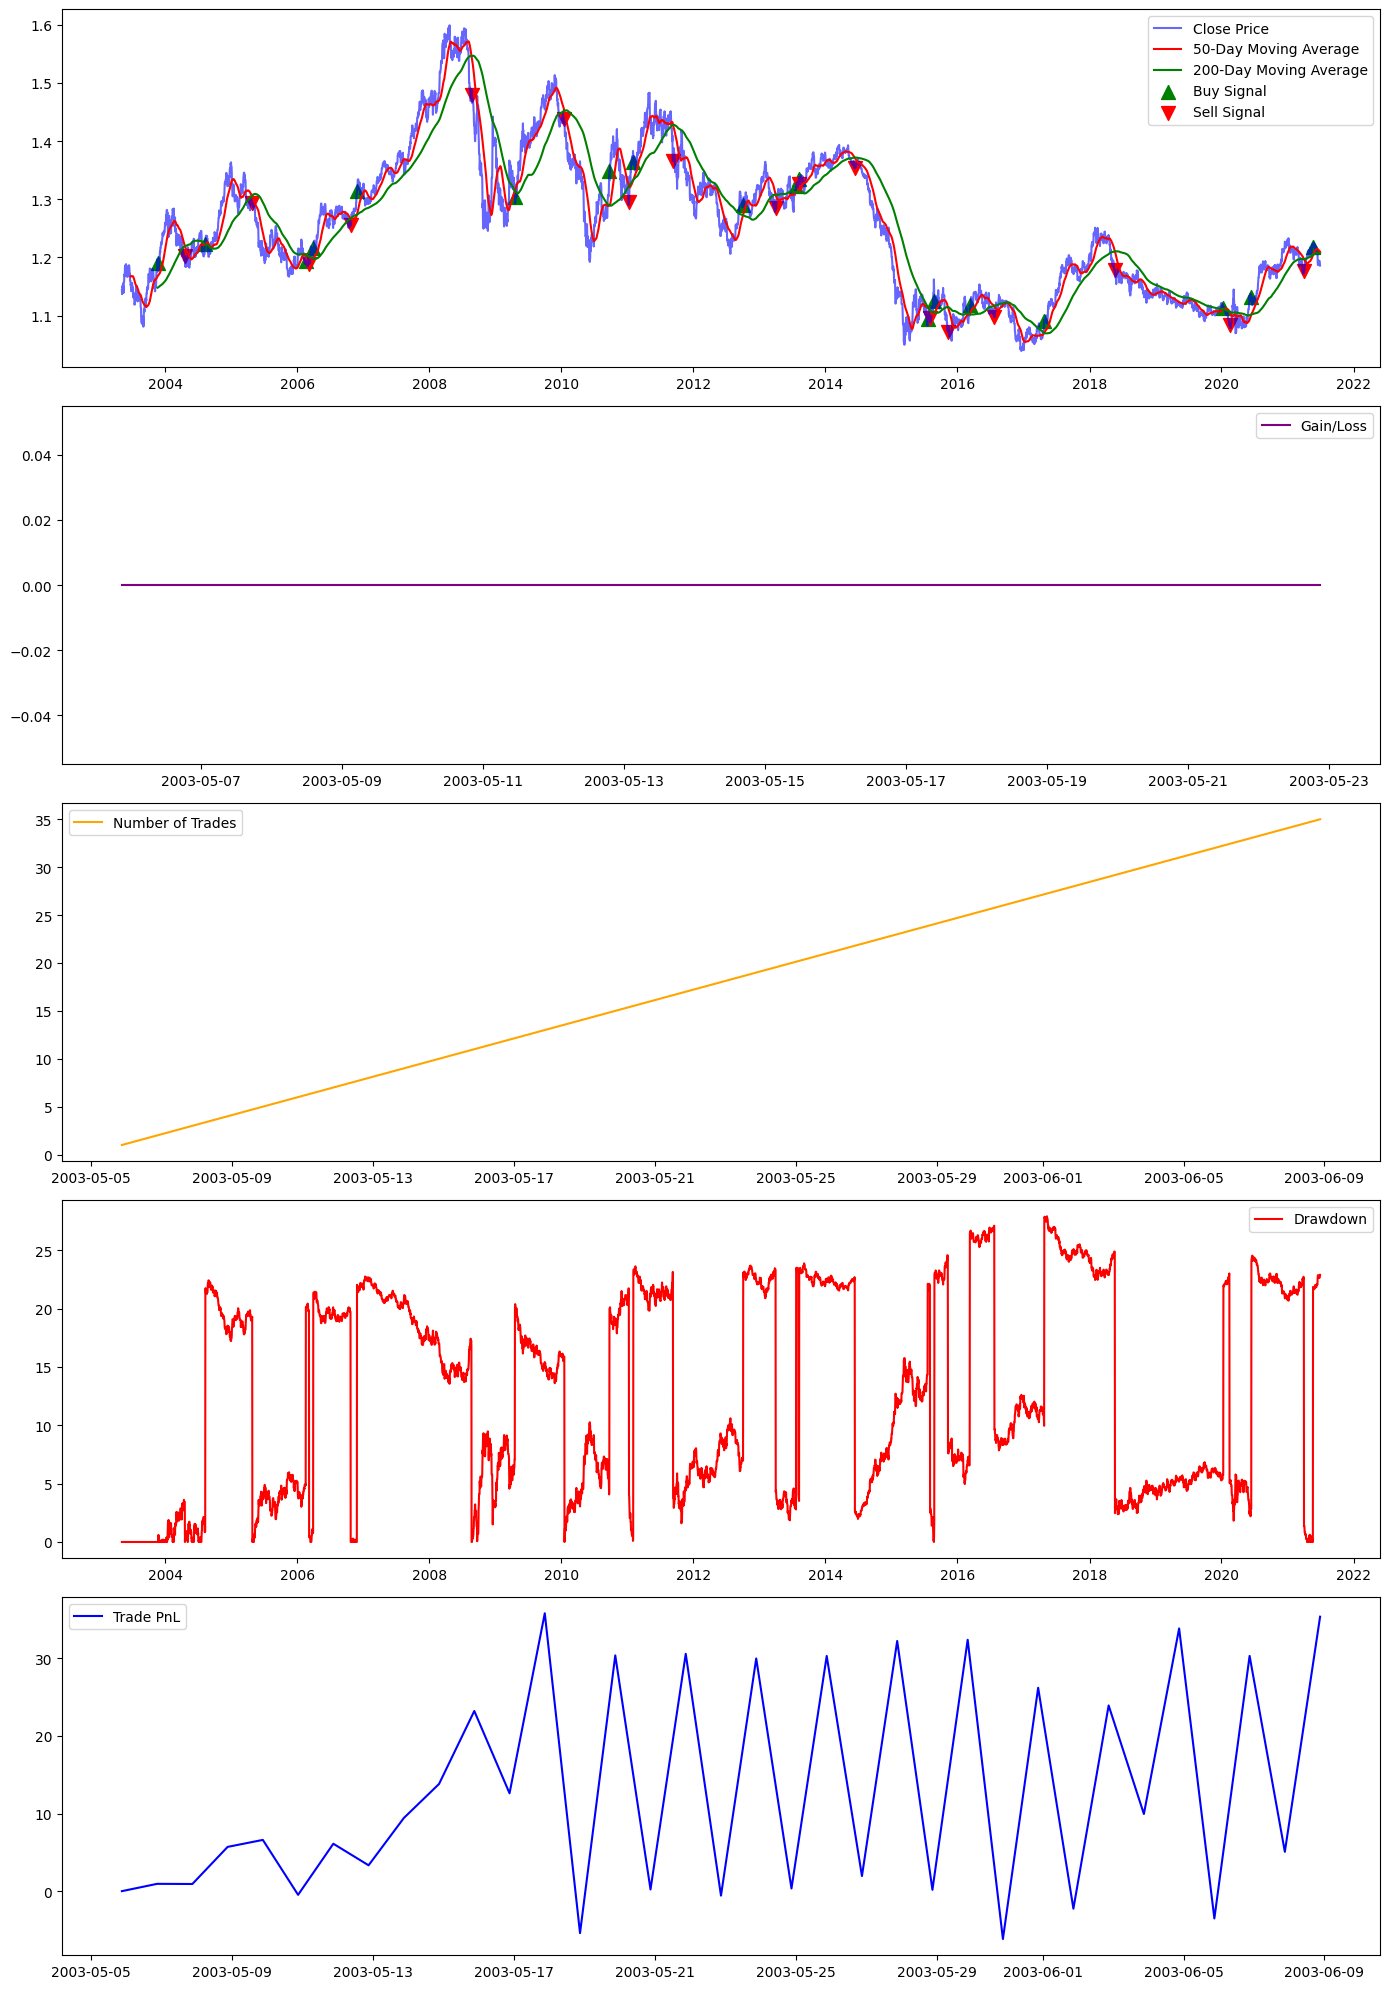

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

class BacktestingFramework:
    def __init__(self, df, start_date, end_date, trading_fees=0, accumulation_factor=0):
        self.df = df[(df.index >= start_date) & (df.index <= end_date)]
        self.start_date = pd.to_datetime(start_date).tz_localize(None)
        self.end_date = pd.to_datetime(end_date).tz_localize(None)
        self.positions = []
        self.initial_cash = 100  # Starting cash
        self.cash = self.initial_cash  # Current cash
        self.holdings = 0  # Initial holdings
        self.short_holdings = 0  # Initial short holdings
        self.position_value = 0
        self.duration = 1  # Default duration in days
        self.trading_fees = trading_fees  # Trading fees per trade
        self.initial_portfolio_value = None
        self.final_portfolio_value = None
        self.percent_gain_loss = None
        self.accumulation_factor = accumulation_factor  # Accumulation factor for reinvesting gains
        self.gain_loss_list = []
        self.trade_pnl_list = []
        self.drawdown_list = []
        self.num_trades_list = []
        self.portfolio_values = []  # Initialize the list to store portfolio values

    def backtest(self):
        self.initial_portfolio_value = self.initial_cash
        for index, row in self.df.iterrows():
            if row['positions'] == 1 and (len(self.positions) == 0 or self.positions[-1][0] != 'BUY'):
                self.buy(index, row['close'])
            elif row['positions'] == -1 and (len(self.positions) == 0 or self.positions[-1][0] != 'SELL'):
                self.sell(index, row['close'], index)
            self.portfolio_values.append(self.cash + self.holdings * row['close'] - self.short_holdings * row['close'])  # Now you can append values

        # Calculate final portfolio value
        self.final_portfolio_value = self.cash + self.holdings * self.df.iloc[-1]['close'] - self.short_holdings * self.df.iloc[-1]['close']
        self.percent_gain_loss = ((self.final_portfolio_value - self.initial_portfolio_value) / self.initial_portfolio_value) * 100
        self.calculate_drawdowns()

    def buy(self, date, price):
        if self.cash > 0:
            self.holdings = (self.cash - self.trading_fees) / price
            self.cash -= self.trading_fees
            self.positions.append(('BUY', date, price, self.duration, None))
            # Calculate and append metrics
            gain_loss_percentage = 0  # Calculate gain/loss percentage
            self.gain_loss_list.append(gain_loss_percentage)
            self.trade_pnl_list.append(self.cash - self.initial_cash)
            self.drawdown_list.append(min(self.drawdown_list[-1], self.cash) if self.drawdown_list else self.cash)
            self.num_trades_list.append(len(self.positions))
            print(f"BUY: {date} at {price:.5f}, buying approximately {self.holdings:.2f} units with ${self.cash:.2f} after fees, holding for {self.duration} days.")

    def sell(self, date, price, index):
        if self.holdings > 0:
            pnl = (self.holdings * price) - self.cash - self.trading_fees
            self.cash = (self.holdings * price) - self.trading_fees
            gain_loss_percentage = (pnl / self.initial_cash) * 100
            self.trade_pnl_list.append(gain_loss_percentage)
            self.holdings += self.holdings * self.accumulation_factor

            # Calculate and append metrics
            index_naive = index.tz_localize(None)
            duration = (index_naive - self.start_date).days
            self.positions.append(('SELL', date, price, duration, gain_loss_percentage))
            self.num_trades_list.append(len(self.positions))

            print(f"SELL: {date} at {price:.5f}, selling all units for approximately ${self.cash:.2f} after fees. Gain/Loss: {gain_loss_percentage:.2f}% Accumulated holdings: {self.holdings:.2f}")
        elif self.short_holdings == 0:
            self.short_holdings = (self.cash - self.trading_fees) / price
            self.cash -= self.trading_fees

            # Append short position to positions list
            index_naive = index.tz_localize(None)
            duration = (index_naive - self.start_date).days
            self.positions.append(('SHORT', date, price, duration, None))
            self.num_trades_list.append(len(self.positions))

            print(f"SHORT: {date} at {price:.5f}, shorting approximately")

    def calculate_drawdowns(self):
        peak = self.portfolio_values[0]
        self.drawdown_list = [] # Reset drawdown_list
        for value in self.portfolio_values:
            if value > peak:
                peak = value
            drawdown = (peak - value) / peak
            self.drawdown_list.append(drawdown * 100)  # Convert to percentage

    def analyze_results(self):
        print(f"Initial portfolio value: ${self.initial_portfolio_value:.2f}")
        print(f"Final portfolio value: ${self.final_portfolio_value:.2f}")
        print(f"Percentage gain/loss: {self.percent_gain_loss:.2f}%")
        print(f"Total trading duration: {(self.end_date - self.start_date).days} days")
        print(f"Total number of trades: {len(self.positions)}")
        print("\nIndividual Trade Results:")
        for trade in self.positions:
            if trade[0] in ['SELL', 'COVER']:
                print(f"{trade[0]}: Date - {trade[1]}, Price - {trade[2]:.5f}, Duration - {trade[3]} days, Gain/Loss - {trade[4]:.2f}%")

    def plot_results(self):
        buy_dates = [pos[1] for pos in self.positions if pos[0] == 'BUY']
        buy_prices = [pos[2] for pos in self.positions if pos[0] == 'BUY']
        sell_dates = [pos[1] for pos in self.positions if pos[0] == 'SELL']
        sell_prices = [pos[2] for pos in self.positions if pos[0] == 'SELL']

        fig, axs = plt.subplots(5, 1, figsize=(14, 20))
        # Plotting close prices and moving averages
        axs[0].plot(self.df.index, self.df['close'], label='Close Price', color='blue', alpha=0.6)
        axs[0].plot(self.df.index, self.df['short_mavg'], label='50-Day Moving Average', color='red')
        axs[0].plot(self.df.index, self.df['long_mavg'], label='200-Day Moving Average', color='green')
        axs[0].scatter(buy_dates, buy_prices, marker='^', color='green', label='Buy Signal', s=100)
        axs[0].scatter(sell_dates, sell_prices, marker='v', color='red', label='Sell Signal', s=100)
        axs[0].legend()

        # Plotting gain/loss
        axs[1].plot(self.df.index[:len(self.gain_loss_list)], self.gain_loss_list, label='Gain/Loss', color='purple')
        axs[1].legend()

        # Plotting number of trades
        axs[2].plot(self.df.index[:len(self.num_trades_list)], self.num_trades_list, label='Number of Trades', color='orange')
        axs[2].legend()

        # Plotting drawdown
        axs[3].plot(self.df.index[:len(self.drawdown_list)], self.drawdown_list, label='Drawdown', color='red')
        axs[3].legend()

        # Plotting trade PnL
        axs[4].plot(self.df.index[:len(self.trade_pnl_list)], self.trade_pnl_list, label='Trade PnL', color='blue')
        axs[4].legend()

        plt.tight_layout()
        plt.show()

bt = BacktestingFramework(df, '2003-05-05', '2021-06-30', trading_fees=0.01, accumulation_factor=0.5)
bt.duration = 5
bt.backtest()
bt.analyze_results()
bt.plot_results()


# **Pands Ta library**

#Installing required library

In [3]:
#!pip install pandas_ta
#!pip install vectorbt

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_ta as ta
import vectorbt as vbt
import plotly.graph_objects as go

# Importing Dataset and defining strategy and using vectorbt to run backtest

In [36]:
df=pd.read_csv('/content/drive/MyDrive/Internship/Copy of EURUSD_05.05.2003-30.06.2021(1).csv')
df.columns=['time', 'open', 'high', 'low', 'close', 'volume']
df.reset_index(drop=True, inplace=True)
# Reset the index to bring back the 'time' column
df = df.reset_index()
# Now set the 'time' column as the index
df = df.set_index(['time'])
df.head()

df.index = pd.to_datetime(df.index, format='%d.%m.%Y %H:%M:%S.%f GMT%z', utc=True) # Set utc=True to handle timezone-aware datetimes
# Calculate SMA
df['SMA_50'] = ta.sma(df['close'], length=50)
df['SMA_200'] = ta.sma(df['close'], length=200)

import vectorbt as vbt

# Define the strategy
entries = df['SMA_50'] > df['SMA_200']
exits = df['SMA_50'] < df['SMA_200']

# Run the backtest
pf = vbt.Portfolio.from_signals(df['close'], entries, exits)

# Analyze the results
performance = pf.stats()
print(performance)


Start                           2003-05-04 21:00:00+00:00
End                             2021-06-29 21:00:00+00:00
Period                                 6632 days 00:00:00
Start Value                                         100.0
End Value                                      110.939293
Total Return [%]                                10.939293
Benchmark Return [%]                             5.128364
Max Gross Exposure [%]                              100.0
Total Fees Paid                                   9.92243
Max Drawdown [%]                                20.954557
Max Drawdown Duration                  4235 days 00:00:00
Total Trades                                           18
Total Closed Trades                                    17
Total Open Trades                                       1
Open Trade PnL                                  -3.604385
Win Rate [%]                                    41.176471
Best Trade [%]                                  11.541314
Worst Trade [%

# Different method(vectorbt) : Adding other parameters and plots

In [6]:
import vectorbt as vbt
import pandas as pd

# Set chart height and width
cheight, cwidth = 500, 1000  # Adjust as needed for Chart Height and Width

# Set theme (options: "light", "dark", "seaborn")
vbt.settings.set_theme("dark")

# Must be set
vbt.settings.portfolio["freq"] = "1D"  # Daily frequency for portfolio operations

# Predefine vectorbt Portfolio settings
vbt.settings.portfolio["fees"] = 0.0025  # 0.25% fees
vbt.settings.portfolio["slippage"] = 0.0025  # 0.25% slippage
vbt.settings.portfolio["allow_partial"] = False  # Do not allow partial fills

# Create a DataFrame to display portfolio settings
pf_settings = pd.DataFrame(vbt.settings.portfolio.items(), columns=["Option", "Value"])
pf_settings.set_index("Option", inplace=True)

# Print portfolio settings
print("Portfolio Settings [Initial]")
print(pf_settings)


Portfolio Settings [Initial]
                                                                 Value
Option                                                                
call_seq                                                       default
init_cash                                                        100.0
size                                                               inf
size_type                                                       amount
fees                                                            0.0025
fixed_fees                                                         0.0
slippage                                                        0.0025
reject_prob                                                        0.0
min_size                                                           0.0
max_size                                                           inf
size_granularity                                                   NaN
lock_cash                                       

In [7]:
import pandas as pd
from datetime import datetime
import vectorbt as vbt

def combine_stats(pf: vbt.portfolio.base.Portfolio, ticker: str, strategy: str, mode: int = 0):
    header = pd.Series({
        "Run Time": ta.get_time(full=False, to_string=True),
        "Mode": "LIVE" if mode else "TEST",
        "Strategy": strategy,
        "Direction": vbt.settings.portfolio["signal_direction"],
        "Symbol": ticker.upper(),
        "Fees [%]": 100 * vbt.settings.portfolio["fees"],
        "Slippage [%]": 100 * vbt.settings.portfolio["slippage"],
        "Accumulate": vbt.settings.portfolio["accumulate"],
    })
    rstats = pf.returns_stats().dropna(axis=0).T
    stats = pf.stats().dropna(axis=0).T
    joint = pd.concat([header, stats, rstats])
    return joint[~joint.index.duplicated(keep="first")]

def earliest_common_index(d: dict):
    """Returns index of the earliest common index of all DataFrames in the dict"""
    min_date = None
    for df in d.values():
        if min_date is None:
            min_date = df.index[0]
        elif min_date < df.index[0]:
            min_date = df.index[0]
    return min_date

def dl(tickers: list, same_start: bool = False, **kwargs):
    if isinstance(tickers, str):
        tickers = [tickers]

    if not isinstance(tickers, list) or len(tickers) == 0:
        print("Must be a non-empty list of tickers or symbols")
        return

    if "limit" in kwargs and kwargs["limit"] and len(tickers) > kwargs["limit"]:
        from itertools import islice
        tickers = list(islice(tickers, kwargs["limit"]))
        print(f"[!] Too many assets to compare. Using the first {kwargs['limit']}: {', '.join(tickers)}")

    print(f"[i] Downloading: {', '.join(tickers)}")

    received = {}
    if len(tickers):
        for ticker in tickers:
            received[ticker] = eurusd_df  # Assuming eurusd_df is your preloaded EUR/USD DataFrame
            print(f"[+] {ticker}{received[ticker].shape} {ta.get_time(full=False, to_string=True)}")

    if same_start and len(tickers) > 1:
        earliestci = earliest_common_index(received)
        print(f"[i] Earliest Common Date: {earliestci}")
        result = {ticker: df[df.index > earliestci].copy() for ticker, df in received.items()}
    else:
        result = received
    print(f"[*] Download Complete\n")
    return result

def dtmask(df: pd.DataFrame, start: datetime, end: datetime):
    return df.loc[(df.index >= start) & (df.index <= end)].copy()

def show_data(d: dict):
    for t, df in d.items():
        print(f"{t}[{df.index[0]} - {df.index[-1]}]: {df.shape} {((df.index[-1] - df.index[0]).days) / 365:.2f} years")

def trade_table(pf: vbt.portfolio.base.Portfolio, k: int = 1, total_fees: bool = False):
    if not isinstance(pf, vbt.portfolio.base.Portfolio):
        return
    k = int(k) if isinstance(k, int) and k > 0 else 1

    df = pf.trades.records[["status", "direction", "size", "entry_price", "exit_price", "return", "pnl", "entry_fees", "exit_fees"]]
    if total_fees:
        df["total_fees"] = df["entry_fees"] + df["exit_fees"]

    print(f"\nLast {k} of {df.shape[0]} Trades\n{df.tail(k)}\n")


In [7]:
df=pd.read_csv('/content/drive/MyDrive/Internship/Copy of EURUSD_05.05.2003-30.06.2021(1).csv')
df.columns=['time', 'open', 'high', 'low', 'close', 'volume']
df.reset_index(drop=True, inplace=True)
# Reset the index to bring back the 'time' column
df = df.reset_index()
# Now set the 'time' column as the index
df = df.set_index(['time'])
df.head()

df.index = pd.to_datetime(df.index, format='%d.%m.%Y %H:%M:%S.%f GMT%z', utc=True) # Set utc=True to handle timezone-aware datetimes

In [8]:
import pandas as pd
from datetime import datetime, timezone

start_date = datetime(2003, 5, 5, tzinfo=timezone.utc)
end_date = datetime(2021, 6, 30, tzinfo=timezone.utc)

eurusd_df = dtmask(df, start_date, end_date)

eurusd_df.name = "EUR/USD"
print(f"Analysis of: {eurusd_df.name} from {start_date} to {end_date}")

Analysis of: EUR/USD from 2003-05-05 00:00:00+00:00 to 2021-06-30 00:00:00+00:00


In [ ]:
eurusd_df

index     open     high      low    close  \
time                                                                   
2003-05-05 21:00:00+00:00      1  1.12798  1.14510  1.12738  1.14368   
2003-05-06 21:00:00+00:00      2  1.14367  1.14448  1.13275  1.13677   
2003-05-07 21:00:00+00:00      3  1.13675  1.15092  1.13026  1.15026   
2003-05-08 21:00:00+00:00      4  1.15002  1.15376  1.14362  1.14907   
2003-05-09 21:00:00+00:00      5  1.14907  1.14907  1.14907  1.14907   
...                          ...      ...      ...      ...      ...   
2021-06-25 21:00:00+00:00   6627  1.19392  1.19392  1.19392  1.19392   
2021-06-26 21:00:00+00:00   6628  1.19392  1.19392  1.19392  1.19392   
2021-06-27 21:00:00+00:00   6629  1.19380  1.19447  1.19025  1.19260   
2021-06-28 21:00:00+00:00   6630  1.19297  1.19334  1.18779  1.18973   
2021-06-29 21:00:00+00:00   6631  1.18973  1.19092  1.18452  1.18589   

                                 volume  short_mavg  long_mavg  \
time                                                             
2003-05-05 21:00:00+00:00  1.061123e+06         NaN        NaN   
2003-05-06 21:00:00+00:00  1.056797e+06         NaN        NaN   
2003-05-07 21:00:00+00:00  1.058909e+06         NaN        NaN   
2003-05-08 21:00:00+00:00  1.063989e+06         NaN        NaN   
2003-05-09 21:00:00+00:00  0.000000e+00         NaN        NaN   
...                                 ...         ...        ...   
2021-06-25 21:00:00+00:00  0.000000e+00    1.211349   1.207170   
2021-06-26 21:00:00+00:00  0.000000e+00    1.210888   1.207098   
2021-06-27 21:00:00+00:00  8.515426e+04    1.210401   1.206991   
2021-06-28 21:00:00+00:00  9.889857e+04    1.209938   1.206881   
2021-06-29 21:00:00+00:00  4.301302e+03    1.209355   1.206752   

                           long_positions  short_positions  positions  
time                                                                   
2003-05-05 21:00:00+00:00               0                0          0  
2003-05-06 21:00:00+00:00               0                0          0  
2003-05-07 21:00:00+00:00               0                0          0  
2003-05-08 21:00:00+00:00               0                0          0  
2003-05-09 21:00:00+00:00               0                0          0  
...                                   ...              ...        ...  
2021-06-25 21:00:00+00:00               1                0          1  
2021-06-26 21:00:00+00:00               1                0          1  
2021-06-27 21:00:00+00:00               1                0          1  
2021-06-28 21:00:00+00:00               1                0          1  
2021-06-29 21:00:00+00:00               1                0          1  

[6631 rows x 11 columns]

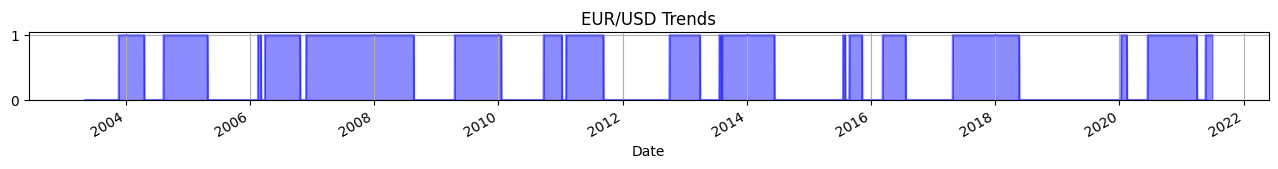

In [26]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

def trends(df: pd.DataFrame, mamode: str = "sma", fast: int = 50, slow: int = 200):
    # Calculate fast and slow SMAs
    sma_fast = ta.ma(mamode, df.close, length=fast)
    sma_slow = ta.ma(mamode, df.close, length=slow)

    # trend condition (SMA(fast) > SMA(slow))
    trend_signal = sma_fast > sma_slow

    return trend_signal
# Define the keyword arguments for the trends function
trend_kwargs = {
    "mamode": "sma",
    "fast": 50,
    "slow": 200
}

# Plotting trends for EUR/USD
eurusd_trends = trends(eurusd_df, **trend_kwargs)  # Pass keyword arguments
eurusd_trends.copy().astype(int).plot(figsize=(16, 1), kind="area", color=["blue"], alpha=0.45, title=f"{eurusd_df.name} Trends", grid=True)

plt.xlabel('Date')
plt.show()

In [10]:

eurusd_trends = trends(eurusd_df)

# Set LIVE to 0 for live signals or 1 for backtesting
LIVE = 0

# Calculate signals based on trends
eurusd_signals = eurusd_df.ta.tsignals(eurusd_trends, asbool=True, trade_offset=LIVE, append=True)
eurusd_signals.tail()


TS_Trends  TS_Trades  TS_Entries  TS_Exits
time                                                                 
2021-06-25 21:00:00+00:00       True          0       False     False
2021-06-26 21:00:00+00:00       True          0       False     False
2021-06-27 21:00:00+00:00       True          0       False     False
2021-06-28 21:00:00+00:00       True          0       False     False
2021-06-29 21:00:00+00:00       True          0       False     False

In [11]:
import vectorbt as vbt


# Create a Portfolio object from holding EUR/USD (Buy and Hold strategy)
eurusd_pf_bnh = vbt.Portfolio.from_holding(eurusd_df['close'])

# Print trade table for the Buy and Hold strategy
print(trade_table(eurusd_pf_bnh))

# Combine and print statistics for the Buy and Hold strategy
combine_stats(eurusd_pf_bnh, eurusd_df.name, "Buy and Hold", LIVE)



Last 1 of 1 Trades
   status  direction       size  entry_price  exit_price    return       pnl  \
0       0          0  87.001494     1.146539     1.18589  0.031821  3.174202   

   entry_fees  exit_fees  
0    0.249377        0.0  

None


Run Time                     Monday July 15, 2024, NYSE: 6:42:39
Mode                                                        TEST
Strategy                                            Buy and Hold
Direction                                               longonly
Symbol                                                   EUR/USD
Fees [%]                                                    0.25
Slippage [%]                                                0.25
Accumulate                                                 False
Start                                  2003-05-05 21:00:00+00:00
End                                    2021-06-29 21:00:00+00:00
Period                                        6631 days 00:00:00
Start Value                                                100.0
End Value                                             103.174202
Total Return [%]                                        3.174202
Benchmark Return [%]                                    3.690718
Max Gross Exposure [%]   

In [31]:
# Create a plot
fig = eurusd_pf_bnh.plot(
    title="EUR/USD Buy and Hold Strategy",
    subplots=[
        "orders",
        "trade_pnl",
        "drawdowns",
        "cum_returns"
    ]
)

# Add moving averages to the plot
fig.add_trace(df['SMA_50'].vbt.plot(trace_kwargs=dict(name='SMA(C,50)'))['data'][0])
fig.add_trace(df['SMA_200'].vbt.plot(trace_kwargs=dict(name='SMA(C,200)'))['data'][0])

# Check if there are trades before adding trade markers
if not pf.trades.records.empty:
    # Ensure the index of trades.records aligns with df
    trade_index = pf.trades.records.index.intersection(df.index)

    # Add trade markers
    fig.add_scatter(x=trade_index,
                    y=df.loc[trade_index, 'close'],
                    mode='markers', marker=dict(symbol='triangle-up', color='green', size=10), name='Buy Trades')
    fig.add_scatter(x=trade_index,
                    y=df.loc[trade_index, 'close'],
                    mode='markers', marker=dict(symbol='triangle-down', color='red', size=10), name='Sell Trades')

# Add trend signals to the plot
fig.add_trace(eurusd_trends.astype(int).vbt.plot(trace_kwargs=dict(name='Trend Signals'))['data'][0])

# Show the plot
fig.show()
